## **Feature extraction and EDA for USER_LOGS**

**1. Loading datasets** <br>
**2. Feature extraction and EDA** <br>

**Run 1:** train.csv has the cutoff date of 2017/01/31 and sample_submission_v2.csv hase the cutoff date of 2017/03/31<br>
> ***Input files:*** 
>>train.csv <br>
>>sample_submission_v2.csv <br>
>>user_logs.csv <br>
>>user_logs_v2.csv <br>

> ***Output files:***
>> *train_logs_part1.csv* <br>
>> *train_logs_part2.csv* <br>
>> *train_logs_part3.csv* <br>
>> *train_logs_part4.csv*<br>
>> *test_logs_part1.csv* <br>
>> *test_logs_part2.csv* <br>
>> *test_logs_part3.csv* <br>
>> *test_logs_part4.csv* <br>

**Run 2:** train_v2.csv has the cutoff date of 2017/02/28 <br>
> ***Input files:*** 
>>train_v2.csv <br>
>>user_logs.csv <br>
>>user_logs_v2.csv <br>

> ***Output files:***
>> *train_logs_v2_part1.csv* <br>
>> *train_logs_v2_part2.csv* <br>
>> *train_logs_v2_part3.csv* <br>
>> *train_logs_v2_part4.csv*<br>

In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import gc

In [2]:
def change_datatype_numeric(df):
    int_cols = list(df.select_dtypes(include=['int64','int32','int16']).columns)
    df[int_cols] = df[int_cols].apply(pd.to_numeric,downcast='unsigned')
    
    float_cols = list(df.select_dtypes(include=['float']).columns)
    df[float_cols] = df[float_cols].apply(pd.to_numeric,downcast='float')
    

In [3]:
def change_datatype_object(df,cols=[]):
    for col in cols:
        df[col] = df[col].astype('category')
        

## 1. Loading datasets

In [4]:
#---------------------train_v2 -----------------(Note: train.csv has different cut off date, so it will be processed separately)
#train = pd.read_csv('..\\data\\refresh\\train_v2.csv')
#train.shape

train = pd.read_csv('..\\data\\train.csv')
train.shape

(992931, 2)

In [5]:
# Change data type for train
train_size = train.memory_usage(index=True).sum()
print('original train accounts for ',train_size/ 1024**2, 'MB')

change_datatype_numeric(train)

train_size = train.memory_usage(index=True).sum()
print('changed train accounts for ',train_size/ 1024**2, 'MB')

original train accounts for  15.1510009765625 MB
changed train accounts for  8.52247142791748 MB


In [6]:
#--------test----------------------
test = pd.read_csv('..\\data\\refresh\\sample_submission_v2.csv')
test.shape

(907471, 2)

In [7]:
# Change data type for train
test_size = test.memory_usage(index=True).sum()
print('original test accounts for ',test_size/ 1024**2, 'MB')

change_datatype_numeric(test)

test_size = test.memory_usage(index=True).sum()
print('changed test accounts for ',test_size/ 1024**2, 'MB')

original test accounts for  13.84698486328125 MB
changed test accounts for  7.788962364196777 MB


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 992931 entries, 0 to 992930
Data columns (total 2 columns):
msno        992931 non-null object
is_churn    992931 non-null uint8
dtypes: object(1), uint8(1)
memory usage: 8.5+ MB


In [9]:
data_train = train

In [10]:
data_test= test

### User_logs at the first glance


In [11]:
# Quick look the user_logs data
user_logs2 = pd.read_csv('..\\data\\refresh\\user_logs_v2.csv',nrows=10)
user_logs2.head(5)

,msno,date,num_25,num_50,num_75,num_985,num_100,num_unq,total_secs
0,u9E91QDTvHLq6NXjEaWv8u4QIqhrHk72kE+w31Gnhdg=,20170331,8,4,0,1,21,18,6309.273
1,nTeWW/eOZA/UHKdD5L7DEqKKFTjaAj3ALLPoAWsU8n0=,20170330,2,2,1,0,9,11,2390.699
2,2UqkWXwZbIjs03dHLU9KHJNNEvEkZVzm69f3jCS+uLI=,20170331,52,3,5,3,84,110,23203.337
3,ycwLc+m2O0a85jSLALtr941AaZt9ai8Qwlg9n0Nql5U=,20170331,176,4,2,2,19,191,7100.454
4,EGcbTofOSOkMmQyN1NMLxHEXJ1yV3t/JdhGwQ9wXjnI=,20170331,2,1,0,1,112,93,28401.558


In [12]:
# Original datatypes (which is defined by inverting user_logs2 in separate notebook)
original_column_types = {'date': 'int64',
                         'msno': 'object',
                         'num_100': 'int64',
                         'num_25': 'int64',
                         'num_50': 'int64',
                         'num_75': 'int64',
                         'num_985': 'int64',
                         'num_unq': 'int64',
                         'total_secs': 'float64'}

In [13]:
# New_datatypes (which is defined by inverting user_logs2 in separate notebook)
new_column_types = {'date': 'uint32',
                     'msno': 'category',
                     'num_100': 'uint16',
                     'num_25': 'uint16',
                     'num_50': 'uint16',
                     'num_75': 'uint16',
                     'num_985': 'uint16',
                     'num_unq': 'uint16',
                     'total_secs': 'float32'}


In [14]:
# modified__datatypes (which is for avoiding error since the columns may contain NA )
modified_column_types = {'date': 'float32',
                     'msno': 'category',
                     'num_100': 'float32',
                     'num_25': 'float32',
                     'num_50': 'float32',
                     'num_75': 'float32',
                     'num_985': 'float32',
                     'num_unq': 'float32',
                     'total_secs': 'float32'}


In [15]:
del user_logs2
gc.collect()

18

## 2. Feature extraction and EDA

### 2.1 Featuring num_25 and general

In [16]:
cols = ['msno','date','num_25']

In [17]:
user_logs1 = pd.read_csv('..\\data\\user_logs.csv',dtype=modified_column_types, usecols=cols)

In [18]:
user_logs1.shape

(103105024, 3)

In [19]:
user_logs = pd.read_csv('..\\data\\refresh\\user_logs_v2.csv',dtype=modified_column_types, usecols=cols)

In [20]:
user_logs.shape

(18396362, 3)

In [21]:
user_logs = user_logs.append(user_logs1, ignore_index=True)

In [22]:
del user_logs1
gc.collect()

12222

In [23]:
user_logs.isnull().sum()

msno      0
date      1
num_25    1
dtype: int64

In [24]:
user_logs.shape

(121501386, 3)

In [25]:
user_logs.fillna(value = 0, inplace=True)

In [26]:
user_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121501386 entries, 0 to 121501385
Data columns (total 3 columns):
msno      object
date      float32
num_25    float32
dtypes: float32(2), object(1)
memory usage: 1.8+ GB


In [27]:
user_logs['date'] = user_logs['date'].astype(dtype='uint32')
user_logs['num_25'] = user_logs['num_25'].astype(dtype='uint16')

In [28]:
#user_logs['msno'].value_counts()

In [29]:
train_logs = pd.merge(train,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
train_logs.shape

(78004433, 4)

In [30]:
train_logs.isnull().sum()

msno             0
is_churn         0
date        159018
num_25      159018
dtype: int64

In [31]:
test_logs = pd.merge(test,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
test_logs.shape

(65630941, 4)

In [32]:
test_logs.isnull().sum()

msno             0
is_churn         0
date        151741
num_25      151741
dtype: int64

In [33]:
del user_logs
gc.collect()

14

In [34]:
# filling missing value for date and num_25

train_logs['date'].fillna(value=0, inplace = True) #### should fill with registration date? or zeros
test_logs['date'].fillna(value= 0, inplace = True)

train_logs['num_25'].fillna(value=0, inplace = True)
test_logs['num_25'].fillna(value=0, inplace = True)

In [35]:
# castdown datatypes
train_logs['date'] = train_logs['date'].astype(dtype='uint32')
test_logs['date'] = test_logs['date'].astype(dtype='uint32')

train_logs['num_25'] = train_logs['num_25'].astype(dtype='uint16')
test_logs['num_25'] = test_logs['num_25'].astype(dtype='uint16')

In [36]:
cutoff_date_train = ((20170131//10**4)*365 + (20170131%10**4)//10**2*30 + (20170131%10**4)%10**2)
#cutoff_date_train = ((20170228//10**4)*365 + (20170228%10**4)//10**2*30 + (20170228%10**4)%10**2)  #-----------------
cutoff_date_test = ((20170331//10**4)*365 + (20170331%10**4)//10**2*30 + (20170331%10**4)%10**2)

In [37]:
# Convert date
train_logs['date_relative']= train_logs['date'].apply(lambda x: cutoff_date_train - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))
test_logs['date_relative']= test_logs['date'].apply(lambda x: cutoff_date_test - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))

### *2.1.1. common streaming*

In [38]:
# 1. total of days streaming

number = train_logs[train_logs['date_relative']>=0].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_train = pd.DataFrame({'msno':number.index, 'total_day_streaming':number.values})

number = test_logs[test_logs['date_relative']>=0].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_test = pd.DataFrame({'msno':number.index, 'total_day_streaming':number.values})

In [39]:
data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_train.head()

,msno,is_churn,total_day_streaming
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,5.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,130.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,63.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,190.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,186.0


In [40]:
data_test = pd.merge(data_test,number_test,on='msno',how='left')
data_test.head()

,msno,is_churn,total_day_streaming
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1.0
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,240.0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,36.0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1.0
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,7.0


In [41]:
data_train['total_day_streaming'].fillna(0, inplace = True)
data_test['total_day_streaming'].fillna(0, inplace = True)

data_train['total_day_streaming']= data_train['total_day_streaming'].astype(dtype= 'uint16')
data_test['total_day_streaming']= data_test['total_day_streaming'].astype(dtype= 'uint16')

C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


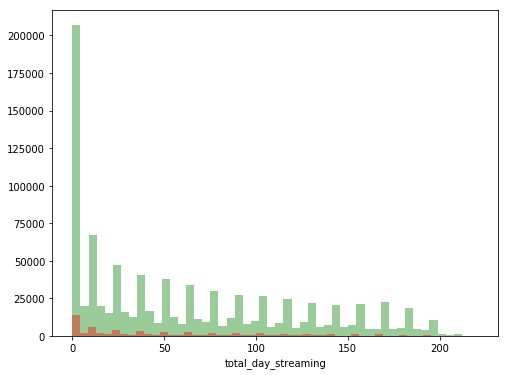

In [42]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)


sns.distplot(data_train[data_train['is_churn']==0]['total_day_streaming'], kde = False, color = 'g', ax=ax1)
sns.distplot(data_train[data_train['is_churn']==1]['total_day_streaming'], kde = False, color = 'r', ax=ax1)


In [43]:
# 2. Latest day streaming from cut off date 
number = train_logs[train_logs['date_relative']>=0].groupby(by='msno')['date_relative'].apply(lambda x: x.iloc[-1])
latest_train = pd.DataFrame({'msno':number.index, 'latest_days_streaming':number.values})

number = test_logs[test_logs['date_relative']>=0].groupby(by='msno')['date_relative'].apply(lambda x: x.iloc[-1])
latest_test = pd.DataFrame({'msno':number.index, 'latest_days_streaming':number.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [44]:
data_train['latest_days_streaming'].fillna(0, inplace = True)
data_test['latest_days_streaming'].fillna(0, inplace = True)

data_train['latest_days_streaming']= data_train['latest_days_streaming'].astype(dtype= 'uint16')
data_test['latest_days_streaming']= data_test['latest_days_streaming'].astype(dtype= 'uint16')

In [45]:
# 3. number of days stream within 1 month from cutoff date (20170228)
number = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<31)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_train = pd.DataFrame({'msno':number.index, 'days_streaming_1m_1st':number.values})

number = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<31)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_test = pd.DataFrame({'msno':number.index, 'days_streaming_1m_1st':number.values})


In [46]:
data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_train.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,5,3,5.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,130,162,NaN
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,63,3,7.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,190,7,13.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,186,46,NaN


In [47]:
data_test = pd.merge(data_test,number_test,on='msno',how='left')
data_test.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,15430,NaN
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,240,1,29.0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,36,3,9.0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,15430,NaN
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,7,45,NaN


In [48]:
data_train['days_streaming_1m_1st'].fillna(0, inplace = True)
data_test['days_streaming_1m_1st'].fillna(0, inplace = True)

In [49]:
data_train['days_streaming_1m_1st']= data_train['days_streaming_1m_1st'].astype(dtype= 'uint8')
data_test['days_streaming_1m_1st']= data_test['days_streaming_1m_1st'].astype(dtype= 'uint8')

In [50]:
data_train.isnull().sum()

msno                     0
is_churn                 0
total_day_streaming      0
latest_days_streaming    0
days_streaming_1m_1st    0
dtype: int64

In [51]:
# 4. number of days stream within 1 month, the second month from cutoff date (20170228)
number = train_logs[(train_logs['date_relative']>=31) & (train_logs['date_relative']<62)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_train = pd.DataFrame({'msno':number.index, 'days_streaming_1m_2nd':number.values})

number = test_logs[(test_logs['date_relative']>=31) & (test_logs['date_relative']<62)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_test = pd.DataFrame({'msno':number.index, 'days_streaming_1m_2nd':number.values})

data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_train.head()

data_test = pd.merge(data_test,number_test,on='msno',how='left')
data_test.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st,days_streaming_1m_2nd
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,15430,0,NaN
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,240,1,29,1.0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,36,3,9,4.0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,15430,0,NaN
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,7,45,0,1.0


In [52]:
data_train['days_streaming_1m_2nd'].fillna(0, inplace = True)
data_test['days_streaming_1m_2nd'].fillna(0, inplace = True)

In [53]:
data_train['days_streaming_1m_2nd']= data_train['days_streaming_1m_2nd'].astype(dtype= 'uint8')
data_test['days_streaming_1m_2nd']= data_test['days_streaming_1m_2nd'].astype(dtype= 'uint8')

In [54]:
# 5. trend in days streaming
data_train['days_streaming_trend']= (data_train['days_streaming_1m_1st'] - data_train['days_streaming_1m_2nd'])/( data_train['days_streaming_1m_2nd'] + 0.001)

data_test['days_streaming_trend']= (data_test['days_streaming_1m_1st'] - data_test['days_streaming_1m_2nd'])/( data_test['days_streaming_1m_2nd'] + 0.001)


In [55]:
data_train.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st,days_streaming_1m_2nd,days_streaming_trend
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,5,3,5,0,5000.000000
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,130,162,0,0,0.000000
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,63,3,7,0,7000.000000
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,190,7,13,0,13000.000000
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,186,46,0,12,20.331639


In [56]:
# 6.  number of days stream within 3 month from cutoff date (20170228)

number = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<92)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_train = pd.DataFrame({'msno':number.index, 'days_streaming_3m':number.values})

number = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<92)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_test = pd.DataFrame({'msno':number.index, 'days_streaming_3m':number.values})



In [57]:
data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_train.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st,days_streaming_1m_2nd,days_streaming_trend,days_streaming_3m
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,5,3,5,0,5000.000000,5.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,130,162,0,0,0.000000,NaN
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,63,3,7,0,7000.000000,7.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,190,7,13,0,13000.000000,26.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,186,46,0,12,20.331639,13.0


In [58]:
data_test = pd.merge(data_test,number_test,on='msno',how='left')
data_test.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st,days_streaming_1m_2nd,days_streaming_trend,days_streaming_3m
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,15430,0,0,0.000000,NaN
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,240,1,29,1,27.972028,44.0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,36,3,9,4,1.249688,24.0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,15430,0,0,0.000000,NaN
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,7,45,0,1,254.745255,7.0


In [59]:
data_train['days_streaming_3m'].fillna(0, inplace = True)
data_test['days_streaming_3m'].fillna(0, inplace = True)

In [60]:
data_train['days_streaming_3m']= data_train['days_streaming_3m'].astype(dtype= 'uint8')
data_test['days_streaming_3m']= data_test['days_streaming_3m'].astype(dtype= 'uint8')

C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


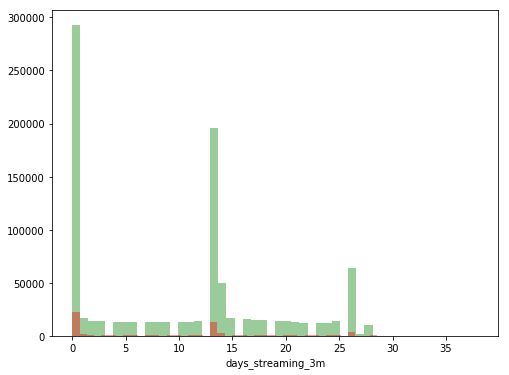

In [61]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)


sns.distplot(data_train[data_train['is_churn']==0]['days_streaming_3m'], kde = False, color = 'g', ax=ax1)
sns.distplot(data_train[data_train['is_churn']==1]['days_streaming_3m'], kde = False, color = 'r', ax=ax1)


In [62]:
# 7. number of days stream within 6 month from cutoff date 

number = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<183)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_train = pd.DataFrame({'msno':number.index, 'days_streaming_6m':number.values})

number = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<183)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_test = pd.DataFrame({'msno':number.index, 'days_streaming_6m':number.values})



In [63]:
data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_train.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st,days_streaming_1m_2nd,days_streaming_trend,days_streaming_3m,days_streaming_6m
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,5,3,5,0,5000.000000,5,5.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,130,162,0,0,0.000000,0,13.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,63,3,7,0,7000.000000,7,21.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,190,7,13,0,13000.000000,26,41.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,186,46,0,12,20.331639,13,39.0


In [64]:
data_test = pd.merge(data_test,number_test,on='msno',how='left')
data_test.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st,days_streaming_1m_2nd,days_streaming_trend,days_streaming_3m,days_streaming_6m
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,15430,0,0,0.000000,0,NaN
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,240,1,29,1,27.972028,44,71.0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,36,3,9,4,1.249688,24,24.0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,15430,0,0,0.000000,0,NaN
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,7,45,0,1,254.745255,7,7.0


In [65]:
data_train['days_streaming_6m'].fillna(0, inplace = True)
data_test['days_streaming_6m'].fillna(0, inplace = True)

In [66]:
data_train['days_streaming_6m']= data_train['days_streaming_6m'].astype(dtype= 'uint8')
data_test['days_streaming_6m']= data_test['days_streaming_6m'].astype(dtype= 'uint8')

C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


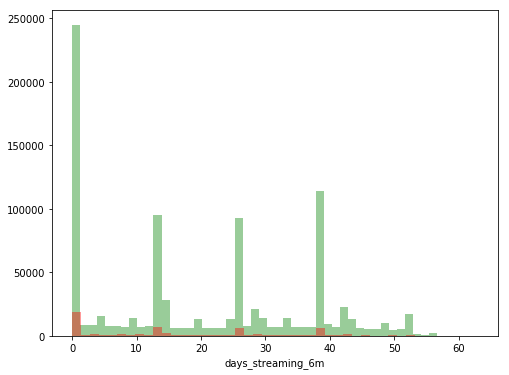

In [67]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)


sns.distplot(data_train[data_train['is_churn']==0]['days_streaming_6m'], kde = False, color = 'g', ax=ax1)
sns.distplot(data_train[data_train['is_churn']==1]['days_streaming_6m'], kde = False, color = 'r', ax=ax1)

In [68]:
# 8. number of days stream within 12 month from cutoff date 

number = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<366)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_train = pd.DataFrame({'msno':number.index, 'days_streaming_12m':number.values})

number = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<366)].groupby(by='msno')['date_relative'].apply(lambda x: x.shape[0])
number_test = pd.DataFrame({'msno':number.index, 'days_streaming_12m':number.values})

In [69]:
data_train = pd.merge(data_train,number_train,on='msno',how='left')
data_train.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st,days_streaming_1m_2nd,days_streaming_trend,days_streaming_3m,days_streaming_6m,days_streaming_12m
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,5,3,5,0,5000.000000,5,5,5.0
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,130,162,0,0,0.000000,0,13,39.0
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,63,3,7,0,7000.000000,7,21,63.0
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,190,7,13,0,13000.000000,26,41,91.0
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,186,46,0,12,20.331639,13,39,91.0


In [70]:
data_test = pd.merge(data_test,number_test,on='msno',how='left')
data_test.head()

,msno,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st,days_streaming_1m_2nd,days_streaming_trend,days_streaming_3m,days_streaming_6m,days_streaming_12m
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,1,15430,0,0,0.000000,0,0,NaN
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,240,1,29,1,27.972028,44,71,114.0
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,36,3,9,4,1.249688,24,24,24.0
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,1,15430,0,0,0.000000,0,0,NaN
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,7,45,0,1,254.745255,7,7,7.0


In [71]:
data_train['days_streaming_12m'].fillna(0, inplace = True)
data_test['days_streaming_12m'].fillna(0, inplace = True)

In [72]:
data_train['days_streaming_12m']= data_train['days_streaming_12m'].astype(dtype= 'uint8')
data_test['days_streaming_12m']= data_test['days_streaming_12m'].astype(dtype= 'uint8')

C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


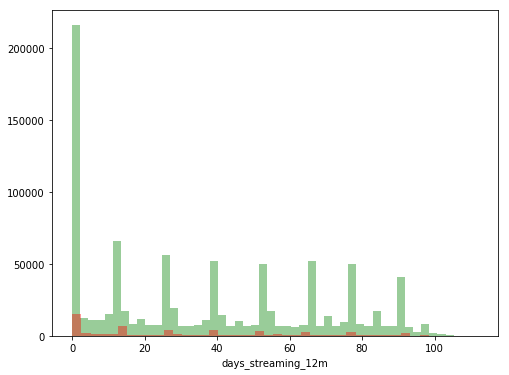

In [73]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)


sns.distplot(data_train[data_train['is_churn']==0]['days_streaming_12m'], kde = False, color = 'g', ax=ax1)
sns.distplot(data_train[data_train['is_churn']==1]['days_streaming_12m'], kde = False, color = 'r', ax=ax1)

In [74]:

data_test.to_csv('features\\test_logs_part1.csv',index=False)
data_train.to_csv('features\\train_logs_part1.csv',index=False)


In [75]:
data_train.describe()

,is_churn,total_day_streaming,latest_days_streaming,days_streaming_1m_1st,days_streaming_1m_2nd,days_streaming_trend,days_streaming_3m,days_streaming_6m,days_streaming_12m
count,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000,992931.000000
mean,0.063923,62.008461,2506.113386,3.498154,3.093417,1927.770739,9.917869,19.706242,36.311817
std,0.244616,58.609652,5618.090992,4.777553,4.570463,4247.804722,8.805252,16.503578,31.123763
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
50%,0.000000,44.000000,31.000000,0.000000,0.000000,10.989011,13.000000,17.000000,30.000000
75%,0.000000,104.000000,126.000000,7.000000,6.000000,62.984254,14.000000,36.000000,65.000000
max,1.000000,221.000000,15370.000000,16.000000,16.000000,14000.000000,38.000000,63.000000,112.000000


In [76]:
del data_train, data_test
gc.collect()

99

### * 2.1.2. Num_25*

In [77]:
data_train = train
data_test = test

In [78]:
# 1. number of song 25% in 1st month

latest = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<31)].groupby(by='msno')['num_25'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_25_1m_1st':latest.values})

latest = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<31)].groupby(by='msno')['num_25'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_25_1m_1st':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [79]:
data_train['num_25_1m_1st'].fillna(0, inplace = True)
data_test['num_25_1m_1st'].fillna(0, inplace = True)

data_train['num_25_1m_1st']= data_train['num_25_1m_1st'].astype(dtype= 'uint32')
data_test['num_25_1m_1st']= data_test['num_25_1m_1st'].astype(dtype= 'uint32')

C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\kartik\AppData\Local\conda\conda\envs\kaggle\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


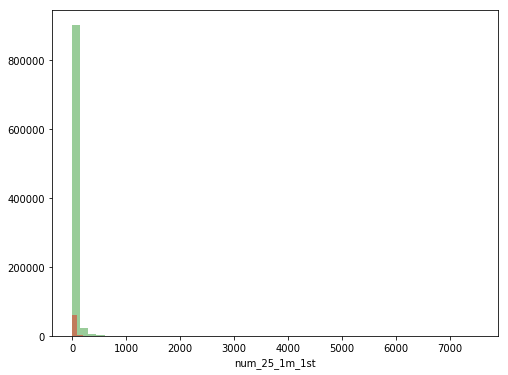

In [80]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)


sns.distplot(data_train[data_train['is_churn']==0]['num_25_1m_1st'], kde = False, color = 'g', ax=ax1)
sns.distplot(data_train[data_train['is_churn']==1]['num_25_1m_1st'], kde = False, color = 'r', ax=ax1)

In [81]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 3 columns):
msno             992931 non-null object
is_churn         992931 non-null uint8
num_25_1m_1st    992931 non-null uint32
dtypes: object(1), uint32(1), uint8(1)
memory usage: 19.9+ MB


In [82]:
# 2. number of song 25% in 2nd month
latest = train_logs[(train_logs['date_relative']>=31) & (train_logs['date_relative']<62)].groupby(by='msno')['num_25'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_25_1m_2nd':latest.values})

latest = test_logs[(test_logs['date_relative']>=31) & (test_logs['date_relative']<62)].groupby(by='msno')['num_25'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_25_1m_2nd':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [83]:
data_train['num_25_1m_2nd'].fillna(0, inplace = True)
data_test['num_25_1m_2nd'].fillna(0, inplace = True)

data_train['num_25_1m_2nd']= data_train['num_25_1m_2nd'].astype(dtype= 'uint32')
data_test['num_25_1m_2nd']= data_test['num_25_1m_2nd'].astype(dtype= 'uint32')

In [84]:
#3. Trend num_25
data_train['num_25_trend']= (data_train['num_25_1m_1st'] - data_train['num_25_1m_2nd'])/( data_train['num_25_1m_2nd'] + 0.001)

data_test['num_25_trend']= (data_test['num_25_1m_1st'] - data_test['num_25_1m_2nd'])/( data_test['num_25_1m_2nd'] + 0.001)


In [85]:
data_test.describe()

,is_churn,num_25_1m_1st,num_25_1m_2nd,num_25_trend
count,907471.0,907471.000000,907471.000000,9.074710e+05
mean,0.0,79.056248,22.269205,3.102718e+07
std,0.0,149.048461,57.240933,2.335728e+08
min,0.0,0.000000,0.000000,0.000000e+00
25%,0.0,1.000000,0.000000,9.638438e-02
50%,0.0,29.000000,1.000000,5.272607e+00
75%,0.0,96.000000,21.000000,1.500000e+04
max,0.0,25094.000000,11208.000000,4.290677e+09


In [86]:
del train_logs, test_logs
gc.collect()

131

### 2.2  Featuring num_50

In [87]:
cols = ['msno','date','num_50']


In [88]:
user_logs1 = pd.read_csv('..\\data\\user_logs.csv',dtype=modified_column_types, usecols=cols)
user_logs = pd.read_csv('..\\data\\refresh\\user_logs_v2.csv',dtype=modified_column_types, usecols=cols)

In [89]:
user_logs = user_logs.append(user_logs1, ignore_index=True)

In [90]:
del user_logs1
gc.collect()

12215

In [91]:
user_logs.isnull().sum()

msno      0
date      1
num_50    1
dtype: int64

In [92]:
user_logs.fillna(value = 0, inplace=True)

In [93]:
user_logs.isnull().sum()

msno      0
date      0
num_50    0
dtype: int64

In [94]:
user_logs['date'] = user_logs['date'].astype(dtype='uint32')
user_logs['num_50'] = user_logs['num_50'].astype(dtype='uint16')

In [95]:
# merging with  train and test
train_logs = pd.merge(train,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
train_logs.shape

(78004433, 4)

In [96]:
train_logs.isnull().sum()

msno             0
is_churn         0
date        159018
num_50      159018
dtype: int64

In [97]:
test_logs = pd.merge(test,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
test_logs.isnull().sum()

msno             0
is_churn         0
date        151741
num_50      151741
dtype: int64

In [98]:
del user_logs
gc.collect()

70

In [99]:
# filling missing value for date and num_50

train_logs['date'].fillna(value=0, inplace = True) #### should fill with registration date? or zeros
test_logs['date'].fillna(value= 0, inplace = True)

train_logs['num_50'].fillna(value=0, inplace = True)
test_logs['num_50'].fillna(value=0, inplace = True)

In [100]:
# castdown datatypes
train_logs['date'] = train_logs['date'].astype(dtype='uint32')
test_logs['date'] = test_logs['date'].astype(dtype='uint32')

train_logs['num_50'] = train_logs['num_50'].astype(dtype='uint16')
test_logs['num_50'] = test_logs['num_50'].astype(dtype='uint16')

In [101]:
# Convert date
train_logs['date_relative']= train_logs['date'].apply(lambda x: cutoff_date_train - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))
test_logs['date_relative']= test_logs['date'].apply(lambda x: cutoff_date_test - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))

In [102]:
# 1. number of song 50% in 1st month


latest = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<31)].groupby(by='msno')['num_50'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_50_1m_1st':latest.values})

latest = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<31)].groupby(by='msno')['num_50'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_50_1m_1st':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [103]:
data_train.describe()

,is_churn,num_25_1m_1st,num_25_1m_2nd,num_25_trend,num_50_1m_1st
count,992931.000000,992931.000000,992931.000000,9.929310e+05,460143.000000
mean,0.063923,22.432983,20.273772,9.641255e+07,11.651178
std,0.244616,57.430276,55.100904,3.984116e+08,17.527473
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,2.000000
50%,0.000000,0.000000,0.000000,3.396603e+01,6.000000
75%,0.000000,21.000000,16.000000,3.278576e+07,15.000000
max,1.000000,7526.000000,3718.000000,4.290677e+09,1038.000000


In [104]:
data_train['num_50_1m_1st'].fillna(0, inplace = True)
data_test['num_50_1m_1st'].fillna(0, inplace = True)

data_train['num_50_1m_1st']= data_train['num_50_1m_1st'].astype(dtype= 'uint32')
data_test['num_50_1m_1st']= data_test['num_50_1m_1st'].astype(dtype= 'uint32')

In [105]:
# 2. number of song 50 in 2nd month
latest = train_logs[(train_logs['date_relative']>=31) & (train_logs['date_relative']<62)].groupby(by='msno')['num_50'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_50_1m_2nd':latest.values})

latest = test_logs[(test_logs['date_relative']>=31) & (test_logs['date_relative']<62)].groupby(by='msno')['num_50'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_50_1m_2nd':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [106]:
data_train['num_50_1m_2nd'].fillna(0, inplace = True)
data_test['num_50_1m_2nd'].fillna(0, inplace = True)

data_train['num_50_1m_2nd']= data_train['num_50_1m_2nd'].astype(dtype= 'uint32')
data_test['num_50_1m_2nd']= data_test['num_50_1m_2nd'].astype(dtype= 'uint32')

In [107]:
#3. Trend num_50
data_train['num_50_trend']= (data_train['num_50_1m_1st'] - data_train['num_50_1m_2nd'])/( data_train['num_50_1m_2nd'] + 0.001)

data_test['num_50_trend']= (data_test['num_50_1m_1st'] - data_test['num_50_1m_2nd'])/( data_test['num_50_1m_2nd'] + 0.001)


In [108]:
del train_logs, test_logs
gc.collect()

133

In [109]:
data_train.head()

,msno,is_churn,num_25_1m_1st,num_25_1m_2nd,num_25_trend,num_50_1m_1st,num_50_1m_2nd,num_50_trend
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,9,0,9.000000e+03,3,0,3.000000e+03
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,0,0,0.000000e+00,0,0,0.000000e+00
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,20,0,2.000000e+04,6,0,6.000000e+03
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,126,0,1.260000e+05,45,0,4.500000e+04
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,0,9,4.771656e+08,0,2,2.146410e+09


### 2.3 EDA and Featuring num_75

In [110]:
cols = ['msno','date','num_75']


In [111]:
user_logs1 = pd.read_csv('..\\data\\user_logs.csv',dtype=modified_column_types, usecols=cols)
user_logs = pd.read_csv('..\\data\\refresh\\user_logs_v2.csv',dtype=modified_column_types, usecols=cols)

In [112]:
user_logs = user_logs.append(user_logs1, ignore_index=True)

In [113]:
del user_logs1
gc.collect()

12159

In [114]:
user_logs.isnull().sum()

msno      0
date      1
num_75    1
dtype: int64

In [115]:
user_logs.fillna(value = 0, inplace=True)

In [116]:
user_logs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121501386 entries, 0 to 121501385
Data columns (total 3 columns):
msno      object
date      float32
num_75    float32
dtypes: float32(2), object(1)
memory usage: 1.8+ GB


In [117]:
user_logs['date'] = user_logs['date'].astype(dtype='uint32')
user_logs['num_75'] = user_logs['num_75'].astype(dtype='uint16')

In [118]:
# merging with  train and test
train_logs = pd.merge(train,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
train_logs.shape

(78004433, 4)

In [119]:
test_logs = pd.merge(test,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
test_logs.isnull().sum()

msno             0
is_churn         0
date        151741
num_75      151741
dtype: int64

In [120]:
del user_logs
gc.collect()

84

In [121]:
# filling missing value for date and num_75

train_logs['date'].fillna(value=0, inplace = True) #### should fill with registration date? or zeros
test_logs['date'].fillna(value= 0, inplace = True)

train_logs['num_75'].fillna(value=0, inplace = True)
test_logs['num_75'].fillna(value=0, inplace = True)

In [122]:
# castdown datatypes
train_logs['date'] = train_logs['date'].astype(dtype='uint32')
test_logs['date'] = test_logs['date'].astype(dtype='uint32')

train_logs['num_75'] = train_logs['num_75'].astype(dtype='uint16')
test_logs['num_75'] = test_logs['num_75'].astype(dtype='uint16')

In [123]:
# Convert date
train_logs['date_relative']= train_logs['date'].apply(lambda x: cutoff_date_train - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))
test_logs['date_relative']= test_logs['date'].apply(lambda x: cutoff_date_test - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))

In [124]:
# 1. number of song 75% in 1st month


latest = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<31)].groupby(by='msno')['num_75'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_75_1m_1st':latest.values})

latest = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<31)].groupby(by='msno')['num_75'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_75_1m_1st':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [125]:
data_train['num_75_1m_1st'].fillna(0, inplace = True)
data_test['num_75_1m_1st'].fillna(0, inplace = True)

data_train['num_75_1m_1st']= data_train['num_75_1m_1st'].astype(dtype= 'uint32')
data_test['num_75_1m_1st']= data_test['num_75_1m_1st'].astype(dtype= 'uint32')

In [126]:
# 2. number of song 75 in 2nd month
latest = train_logs[(train_logs['date_relative']>=31) & (train_logs['date_relative']<62)].groupby(by='msno')['num_75'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_75_1m_2nd':latest.values})

latest = test_logs[(test_logs['date_relative']>=31) & (test_logs['date_relative']<62)].groupby(by='msno')['num_75'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_75_1m_2nd':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [127]:
data_train['num_75_1m_2nd'].fillna(0, inplace = True)
data_test['num_75_1m_2nd'].fillna(0, inplace = True)

data_train['num_75_1m_2nd']= data_train['num_75_1m_2nd'].astype(dtype= 'uint32')
data_test['num_75_1m_2nd']= data_test['num_75_1m_2nd'].astype(dtype= 'uint32')

In [128]:
#3. Trend num_75
data_train['num_75_trend']= (data_train['num_75_1m_1st'] - data_train['num_75_1m_2nd'])/( data_train['num_75_1m_2nd'] + 0.001)

data_test['num_75_trend']= (data_test['num_75_1m_1st'] - data_test['num_75_1m_2nd'])/( data_test['num_75_1m_2nd'] + 0.001)


In [129]:
data_train[['is_churn','num_75_trend']].corr()

,is_churn,num_75_trend
is_churn,1.000000,-0.012274
num_75_trend,-0.012274,1.000000


In [130]:
data_train.head()

,msno,is_churn,num_25_1m_1st,num_25_1m_2nd,num_25_trend,num_50_1m_1st,num_50_1m_2nd,num_50_trend,num_75_1m_1st,num_75_1m_2nd,num_75_trend
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,9,0,9.000000e+03,3,0,3.000000e+03,3,0,3.000000e+03
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,0,0,0.000000e+00,0,0,0.000000e+00,0,0,0.000000e+00
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,20,0,2.000000e+04,6,0,6.000000e+03,2,0,2.000000e+03
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,126,0,1.260000e+05,45,0,4.500000e+04,33,0,3.300000e+04
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,0,9,4.771656e+08,0,2,2.146410e+09,0,6,7.157086e+08


In [131]:
data_test.head()

,msno,is_churn,num_25_1m_1st,num_25_1m_2nd,num_25_trend,num_50_1m_1st,num_50_1m_2nd,num_50_trend,num_75_1m_1st,num_75_1m_2nd,num_75_trend
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,0,0,0.000000,0,0,0.000000,0,0,0.000000e+00
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,504,15,32.597827,167,2,82.458771,115,6,1.816364e+01
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,79,54,0.462954,19,4,3.749063,1,3,1.431179e+09
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,0,0,0.000000,0,0,0.000000,0,0,0.000000e+00
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,0,0,0.000000,0,0,0.000000,0,0,0.000000e+00


In [132]:
data_test.to_csv('features\\test_logs_part2.csv',index=False)
data_train.to_csv('features\\train_logs_part2.csv',index=False)

In [133]:
del data_train, data_test
gc.collect()

112

### 2.4 EDA and Featuring num_985

In [134]:
data_train = train
data_test = test


In [135]:
cols = ['msno','date','num_985']

In [136]:
user_logs1 = pd.read_csv('..\\data\\user_logs.csv',dtype=modified_column_types, usecols=cols)


In [137]:
user_logs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103105024 entries, 0 to 103105023
Data columns (total 3 columns):
msno       category
date       float32
num_985    float32
dtypes: category(1), float32(2)
memory usage: 1.2 GB


In [138]:
user_logs = pd.read_csv('..\\data\\refresh\\user_logs_v2.csv',dtype=modified_column_types, usecols=cols)

In [139]:
user_logs = user_logs.append(user_logs1, ignore_index=True)

In [140]:
del user_logs1
gc.collect()

12250

In [141]:
user_logs.fillna(value = 0, inplace=True)

In [142]:
user_logs.isnull().sum()

msno       0
date       0
num_985    0
dtype: int64

In [143]:
user_logs['date'] = user_logs['date'].astype(dtype='uint32')
user_logs['num_985'] = user_logs['num_985'].astype(dtype='uint16')

In [144]:
# merging with  train and test
train_logs = pd.merge(train,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
train_logs.shape

(78004433, 4)

In [145]:
test_logs = pd.merge(test,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
test_logs.isnull().sum()

msno             0
is_churn         0
date        151741
num_985     151741
dtype: int64

In [146]:
del user_logs
gc.collect()

84

In [147]:
# filling missing value for date and num_75
train_logs['date'].fillna(value=0, inplace = True) #### should fill with registration date? or zeros
test_logs['date'].fillna(value= 0, inplace = True)

train_logs['num_985'].fillna(value=0, inplace = True)
test_logs['num_985'].fillna(value=0, inplace = True)

In [148]:
# castdown datatypes
train_logs['date'] = train_logs['date'].astype(dtype='uint32')
test_logs['date'] = test_logs['date'].astype(dtype='uint32')

train_logs['num_985'] = train_logs['num_985'].astype(dtype='uint16')
test_logs['num_985'] = test_logs['num_985'].astype(dtype='uint16')

In [149]:
# Convert date
train_logs['date_relative']= train_logs['date'].apply(lambda x: cutoff_date_train - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))
test_logs['date_relative']= test_logs['date'].apply(lambda x: cutoff_date_test - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))

In [150]:
# 1. number of song 985% in 1st month


latest = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<31)].groupby(by='msno')['num_985'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_985_1m_1st':latest.values})

latest = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<31)].groupby(by='msno')['num_985'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_985_1m_1st':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [151]:
data_train['num_985_1m_1st'].fillna(0, inplace = True)
data_test['num_985_1m_1st'].fillna(0, inplace = True)

data_train['num_985_1m_1st']= data_train['num_985_1m_1st'].astype(dtype= 'uint32')
data_test['num_985_1m_1st']= data_test['num_985_1m_1st'].astype(dtype= 'uint32')

In [152]:
# 2. number of song 985 in 2nd month
latest = train_logs[(train_logs['date_relative']>=31) & (train_logs['date_relative']<62)].groupby(by='msno')['num_985'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_985_1m_2nd':latest.values})

latest = test_logs[(test_logs['date_relative']>=31) & (test_logs['date_relative']<62)].groupby(by='msno')['num_985'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_985_1m_2nd':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [153]:
data_train.head()

,msno,is_churn,num_985_1m_1st,num_985_1m_2nd
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,1,NaN
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,0,NaN
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,9,NaN
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,37,NaN
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,0,15.0


In [154]:
data_train['num_985_1m_2nd'].fillna(0, inplace = True)
data_test['num_985_1m_2nd'].fillna(0, inplace = True)

data_train['num_985_1m_2nd']= data_train['num_985_1m_2nd'].astype(dtype= 'uint32')
data_test['num_985_1m_2nd']= data_test['num_985_1m_2nd'].astype(dtype= 'uint32')

In [155]:
#3. Trend num_985
data_train['num_985_trend']= (data_train['num_985_1m_1st'] - data_train['num_985_1m_2nd'])/( data_train['num_985_1m_2nd'] + 0.001)

data_test['num_985_trend']= (data_test['num_985_1m_1st'] - data_test['num_985_1m_2nd'])/( data_test['num_985_1m_2nd'] + 0.001)


In [156]:
data_train.describe()

,is_churn,num_985_1m_1st,num_985_1m_2nd,num_985_trend
count,992931.000000,992931.000000,992931.000000,9.929310e+05
mean,0.063923,3.920234,3.462063,2.634287e+08
std,0.244616,12.091860,11.502450,7.286044e+08
min,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00
50%,0.000000,0.000000,0.000000,3.499125e+00
75%,0.000000,4.000000,3.000000,1.130225e+08
max,1.000000,2215.000000,2957.000000,4.290677e+09


In [157]:
data_test.describe()

,is_churn,num_985_1m_1st,num_985_1m_2nd,num_985_trend
count,907471.0,907471.000000,907471.000000,9.074710e+05
mean,0.0,13.366472,3.916034,8.632279e+07
std,0.0,35.158903,13.151092,4.448256e+08
min,0.0,0.000000,0.000000,0.000000e+00
25%,0.0,0.000000,0.000000,0.000000e+00
50%,0.0,5.000000,0.000000,3.272430e+00
75%,0.0,16.000000,4.000000,5.000000e+03
max,0.0,15081.000000,3782.000000,4.290677e+09


### 2.5 EDA and Featuring num_100

In [158]:
cols = ['msno','date','num_100']

In [159]:
user_logs1 = pd.read_csv('..\\data\\user_logs.csv',dtype=modified_column_types, usecols=cols)
user_logs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103105024 entries, 0 to 103105023
Data columns (total 3 columns):
msno       category
date       float32
num_100    float32
dtypes: category(1), float32(2)
memory usage: 1.2 GB


In [160]:
user_logs = pd.read_csv('..\\data\\refresh\\user_logs_v2.csv',dtype=modified_column_types, usecols=cols)

In [161]:
user_logs = user_logs.append(user_logs1, ignore_index=True)

In [162]:
del user_logs1
gc.collect()

11837

In [163]:
user_logs.isnull().sum()

msno       0
date       1
num_100    1
dtype: int64

In [164]:
user_logs.fillna(value = 0, inplace=True)

In [165]:
user_logs['date'] = user_logs['date'].astype(dtype='uint32')
user_logs['num_100'] = user_logs['num_100'].astype(dtype='uint16')

In [166]:
# merging with  train and test
train_logs = pd.merge(train,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
train_logs.isnull().sum()

msno             0
is_churn         0
date        159018
num_100     159018
dtype: int64

In [167]:
test_logs = pd.merge(test,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
test_logs.isnull().sum()

msno             0
is_churn         0
date        151741
num_100     151741
dtype: int64

In [168]:
del user_logs
gc.collect()

84

In [169]:
# filling missing value for date and num_100
train_logs['date'].fillna(value=0, inplace = True) #### should fill with registration date? or zeros
test_logs['date'].fillna(value= 0, inplace = True)

train_logs['num_100'].fillna(value=0, inplace = True)
test_logs['num_100'].fillna(value=0, inplace = True)

In [170]:
# castdown datatypes
train_logs['date'] = train_logs['date'].astype(dtype='uint32')
test_logs['date'] = test_logs['date'].astype(dtype='uint32')

train_logs['num_100'] = train_logs['num_100'].astype(dtype='uint16')
test_logs['num_100'] = test_logs['num_100'].astype(dtype='uint16')

In [171]:
# Convert date
train_logs['date_relative']= train_logs['date'].apply(lambda x: cutoff_date_train - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))
test_logs['date_relative']= test_logs['date'].apply(lambda x: cutoff_date_test - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))

In [172]:
# 1. number of song 100% in 1st month


latest = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<31)].groupby(by='msno')['num_100'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_100_1m_1st':latest.values})

latest = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<31)].groupby(by='msno')['num_100'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_100_1m_1st':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [173]:
data_train['num_100_1m_1st'].fillna(0, inplace = True)
data_test['num_100_1m_1st'].fillna(0, inplace = True)

data_train['num_100_1m_1st']= data_train['num_100_1m_1st'].astype(dtype= 'uint32')
data_test['num_100_1m_1st']= data_test['num_100_1m_1st'].astype(dtype= 'uint32')

In [174]:
# 2. number of song 100 in 2nd month
latest = train_logs[(train_logs['date_relative']>=31) & (train_logs['date_relative']<62)].groupby(by='msno')['num_100'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_100_1m_2nd':latest.values})

latest = test_logs[(test_logs['date_relative']>=31) & (test_logs['date_relative']<62)].groupby(by='msno')['num_100'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_100_1m_2nd':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [175]:
data_train['num_100_1m_2nd'].fillna(0, inplace = True)
data_test['num_100_1m_2nd'].fillna(0, inplace = True)

data_train['num_100_1m_2nd']= data_train['num_100_1m_2nd'].astype(dtype= 'uint32')
data_test['num_100_1m_2nd']= data_test['num_100_1m_2nd'].astype(dtype= 'uint32')

In [176]:
#3. Trend num_100
data_train['num_100_trend']= (data_train['num_100_1m_1st'] - data_train['num_100_1m_2nd'])/( data_train['num_100_1m_2nd'] + 0.001)

data_test['num_100_trend']= (data_test['num_100_1m_1st'] - data_test['num_100_1m_2nd'])/( data_test['num_100_1m_2nd'] + 0.001)


In [177]:
data_train.head()

,msno,is_churn,num_985_1m_1st,num_985_1m_2nd,num_985_trend,num_100_1m_1st,num_100_1m_2nd,num_100_trend
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,1,0,1.000000e+03,93,0,9.300000e+04
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,0,0,0.000000e+00,0,0,0.000000e+00
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,9,0,9.000000e+03,89,0,8.900000e+04
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,37,0,3.700000e+04,230,0,2.300000e+05
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,0,15,2.863121e+08,0,1138,3.774132e+06


In [178]:
data_test.head()

,msno,is_churn,num_985_1m_1st,num_985_1m_2nd,num_985_trend,num_100_1m_1st,num_100_1m_2nd,num_100_trend
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,0,0,0.000000,0,0,0.000000e+00
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,119,6,18.830195,1493,112,1.233025e+01
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,2,1,0.999001,81,54,4.999907e-01
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,0,0,0.000000,0,0,0.000000e+00
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,0,0,0.000000,0,25,1.717918e+08


In [179]:
data_test.to_csv('features\\test_logs_part3.csv',index=False) 
data_train.to_csv('features\\train_logs_part3.csv',index=False)

In [180]:
del data_train, data_test
gc.collect()

112

### 2.6 EDA and Featuring num_unq

In [181]:
data_train = train
data_test = test


In [182]:
cols = ['msno','date','num_unq']

In [183]:
user_logs1 = pd.read_csv('..\\data\\user_logs.csv',dtype=modified_column_types, usecols=cols)
user_logs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103105024 entries, 0 to 103105023
Data columns (total 3 columns):
msno       category
date       float32
num_unq    float32
dtypes: category(1), float32(2)
memory usage: 1.2 GB


In [184]:
user_logs = pd.read_csv('..\\data\\refresh\\user_logs_v2.csv',dtype=modified_column_types, usecols=cols)

In [185]:
user_logs = user_logs.append(user_logs1, ignore_index=True)

In [186]:
del user_logs1
gc.collect()

12222

In [187]:
user_logs.isnull().sum()

msno       0
date       1
num_unq    1
dtype: int64

In [188]:
user_logs.fillna(value = 0, inplace=True)

In [189]:
user_logs['date'] = user_logs['date'].astype(dtype='uint32')
user_logs['num_unq'] = user_logs['num_unq'].astype(dtype='uint16')

In [190]:
# merging with  train and test
train_logs = pd.merge(train,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
train_logs.isnull().sum()

msno             0
is_churn         0
date        159018
num_unq     159018
dtype: int64

In [191]:
test_logs = pd.merge(test,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
test_logs.isnull().sum()

msno             0
is_churn         0
date        151741
num_unq     151741
dtype: int64

In [192]:
del user_logs
gc.collect()

84

In [193]:
# filling missing value for date and num_100
train_logs['date'].fillna(value=0, inplace = True) #### should fill with registration date? or zeros
test_logs['date'].fillna(value= 0, inplace = True)

train_logs['num_unq'].fillna(value=0, inplace = True)
test_logs['num_unq'].fillna(value=0, inplace = True)

In [194]:
# castdown datatypes
train_logs['date'] = train_logs['date'].astype(dtype='uint32')
test_logs['date'] = test_logs['date'].astype(dtype='uint32')

train_logs['num_unq'] = train_logs['num_unq'].astype(dtype='uint16')
test_logs['num_unq'] = test_logs['num_unq'].astype(dtype='uint16')

In [195]:
# Convert date
train_logs['date_relative']= train_logs['date'].apply(lambda x: cutoff_date_train - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))
test_logs['date_relative']= test_logs['date'].apply(lambda x: cutoff_date_test - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))

In [196]:
# 1. number of song unq in 1st month


latest = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<31)].groupby(by='msno')['num_unq'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_unq_1m_1st':latest.values})

latest = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<31)].groupby(by='msno')['num_unq'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_unq_1m_1st':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [197]:
data_train['num_unq_1m_1st'].fillna(0, inplace = True)
data_test['num_unq_1m_1st'].fillna(0, inplace = True)

data_train['num_unq_1m_1st']= data_train['num_unq_1m_1st'].astype(dtype= 'uint32')
data_test['num_unq_1m_1st']= data_test['num_unq_1m_1st'].astype(dtype= 'uint32')

In [198]:
# 2. number of song unq in 2nd month
latest = train_logs[(train_logs['date_relative']>=31) & (train_logs['date_relative']<62)].groupby(by='msno')['num_unq'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'num_unq_1m_2nd':latest.values})

latest = test_logs[(test_logs['date_relative']>=31) & (test_logs['date_relative']<62)].groupby(by='msno')['num_unq'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'num_unq_1m_2nd':latest.values})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [199]:
data_train['num_unq_1m_2nd'].fillna(0, inplace = True)
data_test['num_unq_1m_2nd'].fillna(0, inplace = True)

data_train['num_unq_1m_2nd']= data_train['num_unq_1m_2nd'].astype(dtype= 'uint32')
data_test['num_unq_1m_2nd']= data_test['num_unq_1m_2nd'].astype(dtype= 'uint32')

In [200]:
#3. Trend num_unq
data_train['num_unq_trend']= (data_train['num_unq_1m_1st'] - data_train['num_unq_1m_2nd'])/( data_train['num_unq_1m_2nd'] + 0.001)

data_test['num_unq_trend']= (data_test['num_unq_1m_1st'] - data_test['num_unq_1m_2nd'])/( data_test['num_unq_1m_2nd'] + 0.001)


In [201]:
data_train.head()

,msno,is_churn,num_unq_1m_1st,num_unq_1m_2nd,num_unq_trend
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,105,0,1.050000e+05
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,0,0,0.000000e+00
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,119,0,1.190000e+05
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,299,0,2.990000e+05
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,0,1124,3.821141e+06


In [202]:
data_test.head()

,msno,is_churn,num_unq_1m_1st,num_unq_1m_2nd,num_unq_trend
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,0,0,0.000000e+00
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,2034,120,1.594987e+01
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,147,105,3.999962e-01
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,0,0,0.000000e+00
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,0,23,1.867296e+08


In [203]:
del train_logs, test_logs
gc.collect()

112

### 2.7 total_secs

In [204]:
cols = ['msno','date','total_secs']

In [205]:
user_logs1 = pd.read_csv('..\\data\\user_logs.csv',dtype=modified_column_types, usecols=cols)
user_logs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103105024 entries, 0 to 103105023
Data columns (total 3 columns):
msno          category
date          float32
total_secs    float32
dtypes: category(1), float32(2)
memory usage: 1.2 GB


In [206]:
user_logs = pd.read_csv('..\\data\\refresh\\user_logs_v2.csv',dtype=modified_column_types, usecols=cols)

In [207]:
user_logs = user_logs.append(user_logs1, ignore_index=True)

In [208]:
del user_logs1
gc.collect()

12215

In [209]:
user_logs.isnull().sum()

msno          0
date          1
total_secs    1
dtype: int64

In [210]:
user_logs.fillna(value = 0, inplace=True)

In [211]:
user_logs['date'] = user_logs['date'].astype(dtype='uint32')
#user_logs['total_secs'] = user_logs['total_secs'].astype(dtype='uint16')

In [212]:
# merging with  train and test
train_logs = pd.merge(train,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
train_logs.isnull().sum()

msno               0
is_churn           0
date          159018
total_secs    159018
dtype: int64

In [213]:
test_logs = pd.merge(test,user_logs.sort_values(by=['msno','date']),on='msno',how='left')
test_logs.isnull().sum()

msno               0
is_churn           0
date          151741
total_secs    151741
dtype: int64

In [214]:
del user_logs
gc.collect()

70

In [215]:
# filling missing value for date and num_100
train_logs['date'].fillna(value=0, inplace = True) #### should fill with registration date? or zeros
test_logs['date'].fillna(value= 0, inplace = True)

train_logs['total_secs'].fillna(value=0, inplace = True)
test_logs['total_secs'].fillna(value=0, inplace = True)

In [216]:
# castdown datatypes
train_logs['date'] = train_logs['date'].astype(dtype='uint32')
test_logs['date'] = test_logs['date'].astype(dtype='uint32')

train_logs['total_secs'] = train_logs['total_secs'].astype(dtype='float32')
test_logs['total_secs'] = test_logs['total_secs'].astype(dtype='float32')

In [217]:
# Convert date
train_logs['date_relative']= train_logs['date'].apply(lambda x: cutoff_date_train - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))
test_logs['date_relative']= test_logs['date'].apply(lambda x: cutoff_date_test - ((x//10**4)*365 + (x%10**4)//10**2*30 + (x%10**4)%10**2))

In [218]:
# 1. total_secs in 1st m ->convert to minute


latest = train_logs[(train_logs['date_relative']>=0) & (train_logs['date_relative']<31)].groupby(by='msno')['total_secs'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'total_secs_1m_1st':latest.values/60})

latest = test_logs[(test_logs['date_relative']>=0) & (test_logs['date_relative']<31)].groupby(by='msno')['total_secs'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'total_secs_1m_1st':latest.values/60})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [219]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 6 columns):
msno                 992931 non-null object
is_churn             992931 non-null uint8
num_unq_1m_1st       992931 non-null uint32
num_unq_1m_2nd       992931 non-null uint32
num_unq_trend        992931 non-null float64
total_secs_1m_1st    460143 non-null float64
dtypes: float64(2), object(1), uint32(2), uint8(1)
memory usage: 38.8+ MB


In [220]:
data_train['total_secs_1m_1st'].fillna(0, inplace = True)
data_test['total_secs_1m_1st'].fillna(0, inplace = True)

data_train['total_secs_1m_1st']= data_train['total_secs_1m_1st'].astype(dtype= 'float32')
data_test['total_secs_1m_1st']= data_test['total_secs_1m_1st'].astype(dtype= 'float32')

In [221]:
# 2. total_secs in 2nd month
latest = train_logs[(train_logs['date_relative']>=31) & (train_logs['date_relative']<62)].groupby(by='msno')['total_secs'].apply(lambda x: x.sum())
latest_train = pd.DataFrame({'msno':latest.index, 'total_secs_1m_2nd':latest.values/60})

latest = test_logs[(test_logs['date_relative']>=31) & (test_logs['date_relative']<62)].groupby(by='msno')['total_secs'].apply(lambda x: x.sum())
latest_test = pd.DataFrame({'msno':latest.index, 'total_secs_1m_2nd':latest.values/60})

data_train = pd.merge(data_train,latest_train,on='msno',how='left')
data_test = pd.merge(data_test,latest_test,on='msno',how='left')

In [222]:
data_train['total_secs_1m_2nd'].fillna(0, inplace = True)
data_test['total_secs_1m_2nd'].fillna(0, inplace = True)

data_train['total_secs_1m_2nd']= data_train['total_secs_1m_2nd'].astype(dtype= 'float32')
data_test['total_secs_1m_2nd']= data_test['total_secs_1m_2nd'].astype(dtype= 'float32')

In [223]:
#3. Trend num_unq
data_train['total_secs_trend']= (data_train['total_secs_1m_1st'] - data_train['total_secs_1m_2nd'])/( data_train['total_secs_1m_2nd'] + 0.001)

data_test['total_secs_trend']= (data_test['total_secs_1m_1st'] - data_test['total_secs_1m_2nd'])/( data_test['total_secs_1m_2nd'] + 0.001)


In [224]:
data_train.head()

,msno,is_churn,num_unq_1m_1st,num_unq_1m_2nd,num_unq_trend,total_secs_1m_1st,total_secs_1m_2nd,total_secs_trend
0,waLDQMmcOu2jLDaV1ddDkgCrB/jl6sD66Xzs0Vqax1Y=,1,105,0,1.050000e+05,419.115051,0.000000,4.191151e+05
1,QA7uiXy8vIbUSPOkCf9RwQ3FsT8jVq2OxDr8zqa7bRQ=,1,0,0,0.000000e+00,0.000000,0.000000,0.000000e+00
2,fGwBva6hikQmTJzrbz/2Ezjm5Cth5jZUNvXigKK2AFA=,1,119,0,1.190000e+05,383.069244,0.000000,3.830692e+05
3,mT5V8rEpa+8wuqi6x0DoVd3H5icMKkE9Prt49UlmK+4=,1,299,0,2.990000e+05,1114.661255,0.000000,1.114661e+06
4,XaPhtGLk/5UvvOYHcONTwsnH97P4eGECeq+BARGItRw=,1,0,1124,3.821141e+06,0.000000,4929.274902,-9.999998e-01


In [225]:
data_test.head()

,msno,is_churn,num_unq_1m_1st,num_unq_1m_2nd,num_unq_trend,total_secs_1m_1st,total_secs_1m_2nd,total_secs_trend
0,4n+fXlyJvfQnTeKXTWT507Ll4JVYGrOC8LHCfwBmPE4=,0,0,0,0.000000e+00,0.000000,0.000000,0.000000
1,aNmbC1GvFUxQyQUidCVmfbQ0YeCuwkPzEdQ0RwWyeZM=,0,2034,120,1.594987e+01,7383.818359,508.141479,13.531002
2,rFC9eSG/tMuzpre6cwcMLZHEYM89xY02qcz7HL4//jc=,0,147,105,3.999962e-01,385.685760,229.975235,0.677072
3,WZ59dLyrQcE7ft06MZ5dj40BnlYQY7PHgg/54+HaCSE=,0,0,0,0.000000e+00,0.000000,0.000000,0.000000
4,aky/Iv8hMp1/V/yQHLtaVuEmmAxkB5GuasQZePJ7NU4=,0,0,23,1.867296e+08,0.000000,109.004501,-0.999991


In [226]:
change_datatype_numeric(data_test)
change_datatype_numeric(data_train)

In [227]:
data_test.to_csv('features\\test_logs_part4.csv',index=False) 
data_train.to_csv('features\\train_logs_part4.csv',index=False)

In [228]:
data_train.describe()

,is_churn,num_unq_1m_1st,num_unq_1m_2nd,num_unq_trend,total_secs_1m_1st,total_secs_1m_2nd,total_secs_trend
count,992931.000000,992931.000000,992931.000000,9.929310e+05,992931.000000,992931.000000,9.929310e+05
mean,0.063923,102.303109,91.007829,2.423370e+07,461.366669,407.993042,2.466013e+05
std,0.244616,199.946914,191.575074,1.801714e+08,984.878723,936.491150,7.987638e+05
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-1.000000e+00
25%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.869914e-01
50%,0.000000,0.000000,0.000000,8.395802e+01,0.000000,0.000000,0.000000e+00
75%,0.000000,131.000000,104.000000,8.694248e+06,547.449280,434.542679,3.820588e+00
max,1.000000,7604.000000,4507.000000,4.290677e+09,55041.871094,54627.203125,5.504187e+07


In [229]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 907471 entries, 0 to 907470
Data columns (total 8 columns):
msno                 907471 non-null object
is_churn             907471 non-null uint8
num_unq_1m_1st       907471 non-null uint32
num_unq_1m_2nd       907471 non-null uint32
num_unq_trend        907471 non-null float32
total_secs_1m_1st    907471 non-null float32
total_secs_1m_2nd    907471 non-null float32
total_secs_trend     907471 non-null float32
dtypes: float32(4), object(1), uint32(2), uint8(1)
memory usage: 35.5+ MB


In [230]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 992931 entries, 0 to 992930
Data columns (total 8 columns):
msno                 992931 non-null object
is_churn             992931 non-null uint8
num_unq_1m_1st       992931 non-null uint32
num_unq_1m_2nd       992931 non-null uint32
num_unq_trend        992931 non-null float32
total_secs_1m_1st    992931 non-null float32
total_secs_1m_2nd    992931 non-null float32
total_secs_trend     992931 non-null float32
dtypes: float32(4), object(1), uint32(2), uint8(1)
memory usage: 38.8+ MB
